## Importing required libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve, classification_report
import warnings 

warnings.filterwarnings('ignore')

## Importing Dataset

In [4]:
from sklearn.datasets import fetch_openml
MNIST = fetch_openml('mnist_784')
feature = MNIST.data
label = MNIST.target

## Displaying images

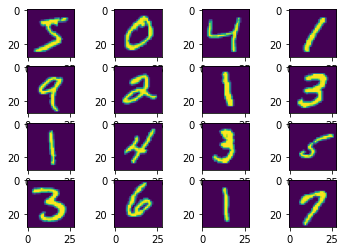

In [11]:
# checking whether data is properly loaded or not
i = 1
for image in feature[0:16]:
    image = image.reshape(28,28)
    plt.subplot(4,4,i)
    plt.imshow(image)
    i+=1

## Count plot of data

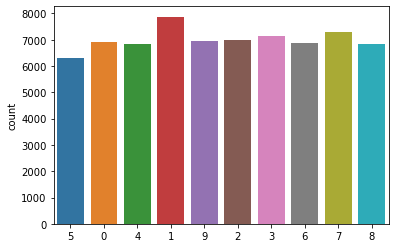

In [20]:
# checking whether data is balanced or not
sns.countplot(label)
plt.show()

The data seems to be balanced

## Splitting dataset into train and test

In [22]:
from sklearn.model_selection import train_test_split

# splitting data into 80:20
x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size = 0.2, random_state = 42)

## Training a random_forest classifier

In [28]:
clf = RandomForestClassifier(n_estimators=200, n_jobs=-1)

clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1)

## Model evaluation

### Accuracy

In [33]:
# evaluating training performance
y_pred_train = clf.predict(x_train)
print('Train accuracy:', accuracy_score(y_train, y_pred_train))

# evaluating test performance
y_pred = clf.predict(x_test)
print('Test accuracy:', accuracy_score(y_test, y_pred))

Train accuracy: 1.0
Test accuracy: 0.9678571428571429


### Confusion Matrix

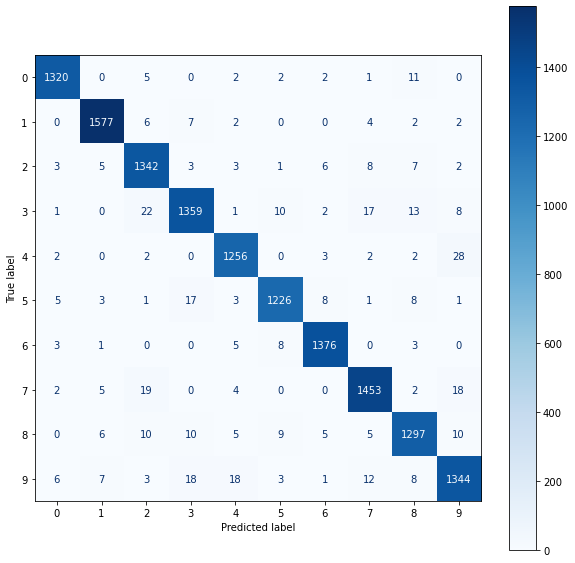

In [36]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf, x_test, y_test, ax=ax, cmap='Blues')

### Classification Report

In [40]:
print('Classification report\n',classification_report(y_test, y_pred))

Classification report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.98      0.99      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.95      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.99      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.96      0.96      1357
           9       0.95      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



**Model reached test accuracy 97%**

To be contd.....